# Tuning Hyperparameters of Simulated Annealing Algorithm

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from optimisation.backend_wrapper import SimulatedAnnealing
from pulses import shaped_pulse

In [20]:
20/50e-9

400000000.0

In [ ]:
# Set global parameters kept constant
n_max = 25
tau = 200e-9
pulse_length = 200
band_dig = 11
amp_dig = 1
amp_max = 0
det_max = 0.5e6
init_temp = 100
w1_max = 2*np.pi*13e6
lambda_val = 1000

opt = SimulatedAnnealing()
test_pulse = opt.run_annealing(
    n_max=n_max,
    pulse_length=pulse_length,
    band_dig=band_dig,
    amp_dig=amp_dig,
    det_max=det_max,
    amp_max=amp_max,
    init_step=0.5,
    w1_max=w1_max,
    lambda_val=lambda_val,
    tau=tau
)

test_pulse.save_to_mat()

 Temperature reduced to   0.89999997615814209     
 Uphill success ratio   0.98351171536013882     
 Best error=    2.6547534565686259E-003
 Temperature reduced to   0.80999995708465633     
 Uphill success ratio   0.98674663828963916     
 Best error=    2.6547534565686259E-003


In [3]:
from pulses import mat_to_pulse
test_pulse = mat_to_pulse('/home/daniel/Projects/Public/github/spin-pulse/250kHz_30MHz/50ns_20250708_160125.mat')
# test_pulse.save_to_mat('500kHz_13MHz')

In [ ]:
[10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 240, 280, 300, 350, 400]

array([ 20.,  50.,  80., 110., 140., 170., 200., 230., 260., 290., 320.,
       350., 380., 410.])

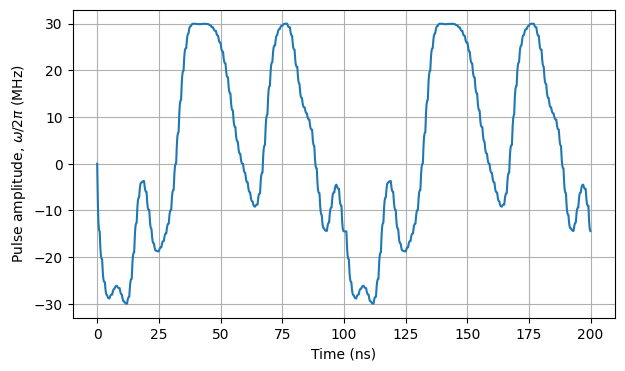

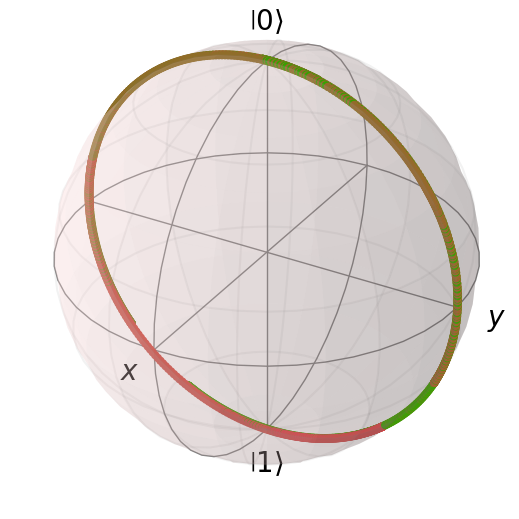

In [10]:
from qubits import *
from simulator import *
from pulses import *

test_pulse = mat_to_pulse('/home/daniel/Projects/Public/github/spin-pulse/q2pulses/100kHz_30MHz/amp_corrected/100ns_20250709_135445.mat')

q = SpinQubit()
sequence = PulseSequence(det=0.05e6)
sequence.add_pulse(test_pulse)
sequence.add_pulse(test_pulse)
sequence.gaussian_filter(fc = 500e6)
sequence.plot_pulse()
states = evolveState(q, sequence)
plotBlochSphere(states[:])

## Cooling rate

In [ ]:
cooling_rate_array = np.array([0.95, 0.99, 0.999])
# cooling_rate_array = np.array([0.5, 0.51])
trial_num = 3
results_array = np.zeros([trial_num, len(cooling_rate_array)])

for c in range(len(cooling_rate_array)):
    cooling_rate = cooling_rate_array[c]
    print(f'Starting cooling rate: {cooling_rate}')
    for i in range(trial_num):
        opt = SimulatedAnnealing()
        pulse = opt.run_annealing(
            n_max=n_max,
            pulse_length=pulse_length,
            band_dig=band_dig,
            amp_dig=amp_dig,
            amp_max=amp_max,
            det_max=det_max,
            init_temp=init_temp,
            cooling_rate=cooling_rate,
            w1_max=w1_max,
            lambda_val=lambda_val,
            tau=tau,
            save_pulse=False)
        
        results_array[i, c] = pulse.best_error
        print(f'Trial {i + 1} of {trial_num} complete.')

Starting cooling rate: 0.95
 Done!
Trial 1 of 3 complete.
 Best Error=    4.8780174344287275E-009
Trial 2 of 3 complete. Done!
 Best Error=    7.7550432742157227E-010

Trial 3 of 3 complete.
Starting cooling rate: 0.99
 Done!
 Best Error=    5.7273197295870659E-009
Trial 1 of 3 complete.
 Done!
 Best Error=    2.3632882317770054E-009
Trial 2 of 3 complete.
 Done!
 Best Error=    5.0138606599858804E-009
Trial 3 of 3 complete.
Starting cooling rate: 0.999
 Done!
 Best Error=    2.0546245815822317E-009


## Starting temperature

In [2]:
# Set global parameters kept constant
n_max = 10
tau = 100e-9
pulse_length = 100
band_dig = 5
amp_dig = 1
amp_max = 0
det_max = 0.1/tau
cooling_rate = 0.95
w1_max = 2*np.pi*40e6
lambda_val = 1000

# starting_temp_array = np.array([1, 100, 1000, 1e4, 1e5])
starting_temp_array = np.array([1, 1e4])
trial_num = 3
results_array = np.zeros([trial_num, len(starting_temp_array)])

for c in range(len(starting_temp_array)):
    
    init_temp = starting_temp_array[c]
    print(f'Starting temp: {init_temp}')

    for i in range(trial_num):
        opt = SimulatedAnnealing()
        pulse = opt.run_annealing(
            n_max=n_max,
            pulse_length=pulse_length,
            band_dig=band_dig,
            amp_dig=amp_dig,
            amp_max=amp_max,
            det_max=det_max,
            init_temp=init_temp,
            cooling_rate=cooling_rate,
            w1_max=w1_max,
            lambda_val=lambda_val,
            tau=tau,
            save_pulse=False)
        
        results_array[i, c] = pulse.best_error
        print(f'Trial {i + 1} of {trial_num} complete.')

Starting temp: 1.0
 Done!
 Best Error=    3.5223053362898327E-009
Trial 1 of 3 complete.
Trial 2 of 3 complete.
 Done!
 Best Error=    3.6846952156111001E-009
Trial 3 of 3 complete.
Starting temp: 10000.0
 Done!
 Best Error=    2.0337740380682590E-009
Trial 1 of 3 complete.
 Done!
 Best Error=    3.9488723402314463E-009
Trial 2 of 3 complete.
 Done!
 Best Error=    3.8902487897729543E-009
Trial 3 of 3 complete.
 Done!
 Best Error=    3.6806969694325176E-009


## Parameter step-size and scaling

In [ ]:
# Code changed to implement T_init = 1 and cooling_rate = 0.95 as fixed metaparams
# Now the initial step-size for fourier coefficient proposal is an input parameter (initially set to 0.2)
# Below we will vary this parameter from 0.05 to 1 in steps of 0.05 and record the convergence results.
# Set global parameters kept constant
n_max = 10
tau = 100e-9
pulse_length = 100
band_dig = 11
amp_dig = 1
amp_max = 0
det_max = 0.1/tau
w1_max = 2*np.pi*40e6
lambda_val = 1000

# init_step_array = np.array([0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
init_step_array = np.array([0.2])
trial_num = 1
results_array = np.zeros([trial_num, len(init_step_array)])

for s in range(len(init_step_array)):
    init_step = init_step_array[s]
    print(f"Starting init_step: {init_step} trials.")

    for i in range(trial_num):
        opt = SimulatedAnnealing()
        pulse = opt.run_annealing(
                n_max=n_max,
                pulse_length=pulse_length,
                band_dig=band_dig,
                amp_dig=amp_dig,
                amp_max=amp_max,
                det_max=det_max,
                init_step = init_step,
                w1_max=w1_max,
                lambda_val=lambda_val,
                tau=tau,
                save_pulse=False)
        
        results_array[i, s] = pulse.best_error

# Plot results
plt.figure(figsize=(8,5))
plt.plot(init_step_array, results_array[0, :], 'o--')
# plt.plot(init_step_array, results_array[1, :], 'o--')
# plt.plot(init_step_array, results_array[2, :], 'o--')
plt.yscale("log")
plt.ylabel("Training error")
plt.xlabel("Simulated Annelaing init step_size")
plt.title(f"Cooling rate tuning, {trial_num} trials per rate")
plt.show()

Starting init_step: 0.2 trials.


## Band-dig and amp-dig

## Pulse time and maximum amplitude

## 